<a href="https://colab.research.google.com/github/RishipriyaDeekonda/Smartbridge/blob/main/major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing the libraries**

In [1]:
import os
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array


**Loading the Dataset**

In [2]:
!pip install kaggle

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle


cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d elinachen717/municipal-solid-waste-dataset


Dataset URL: https://www.kaggle.com/datasets/elinachen717/municipal-solid-waste-dataset
License(s): CC0-1.0
  0% 0.00/4.81M [00:00<?, ?B/s]
100% 4.81M/4.81M [00:00<00:00, 57.1MB/s]


In [5]:
!unzip /content/municipal-solid-waste-dataset.zip


Archive:  /content/municipal-solid-waste-dataset.zip
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_0.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_10.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_100.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1000.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1004.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1005.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1007.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1008.jpeg  
  inflating: Dataset/Biodegradable Images/TEST_BIODEG_HFL_1009.jpeg  
  inflating: Dataset/Biodegradable Images/TRAIN.1_BIODEG_ORI_10035.jpg  
  inflating: Dataset/Biodegradable Images/TRAIN.2_BIODEG_ORI_10025.jpg  
  inflating: Dataset/Biodegradable Images/TRAIN.2_BIODEG_ORI_10043.jpg  
  inflating: Dataset/Biodegradable Im

**Set Path to the Dataset:**

In [6]:
dataset_dir = '/content/Dataset'
classes = os.listdir(dataset_dir)


**Create Output Directories for Train, Validation, and Test Sets:**

In [7]:
output_dir = 'output_dataset'
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)


**Create Subdirectories for Each Class:**

In [8]:
for cls in classes:
    os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', cls), exist_ok=True)


**Split the Dataset:**

In [9]:
    class_dir = os.path.join(dataset_dir, cls)
    images = os.listdir(class_dir)
    print(cls, len(images))

    train_and_val_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    train_images, val_images = train_test_split(train_and_val_images, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2


Recyclable Images 130


In [10]:
import os
from sklearn.model_selection import train_test_split

# Define your dataset directory
dataset_dir = '/content/Dataset'  # Update this to the path where your dataset is located

# Define a dictionary to hold images for each class
data_splits = {}

# Loop through each class in the dataset directory
for cls in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, cls)

    # Check if it's a directory (to avoid files in dataset_dir)
    if os.path.isdir(class_dir):
        # Get list of images in the current class directory
        images = os.listdir(class_dir)
        print(f"{cls}: {len(images)} images found")

        # Split images into train, validation, and test sets
        train_and_val_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
        train_images, val_images = train_test_split(train_and_val_images, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

        # Store splits in the dictionary
        data_splits[cls] = {
            'train': train_images,
            'val': val_images,
            'test': test_images
        }

# Print the results to verify
for cls, splits in data_splits.items():
    print(f"\nClass: {cls}")
    print(f"  Train: {len(splits['train'])} images")
    print(f"  Validation: {len(splits['val'])} images")
    print(f"  Test: {len(splits['test'])} images")


Biodegradable Images: 130 images found
Trash Images: 130 images found
Recyclable Images: 130 images found

Class: Biodegradable Images
  Train: 78 images
  Validation: 26 images
  Test: 26 images

Class: Trash Images
  Train: 78 images
  Validation: 26 images
  Test: 26 images

Class: Recyclable Images
  Train: 78 images
  Validation: 26 images
  Test: 26 images


**Copy Images to Respective Directories**:

In [11]:
    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))
    for img in val_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))
    for img in test_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'test', cls, img))
print("Dataset split into training, validation, and test sets.")


Dataset split into training, validation, and test sets.


**Define Directory Paths:**

In [12]:
dataset_dir = '/content/output_dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')


**Define Image Size**:

In [13]:
IMG_SIZE = (224, 224)  # Common size for pre-trained models


**Create ImageDataGenerator for Augmentation and Rescaling:**

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

**Load and Resize Images from Directories:**

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define ImageDataGenerators for resizing and augmenting the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define a separate ImageDataGenerator for validation and test (no augmentation, only rescaling)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load and resize the images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'  # Assuming binary classification
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Do not shuffle test data
)



Found 78 images belonging to 3 classes.
Found 26 images belonging to 3 classes.
Found 26 images belonging to 3 classes.


**Print Class Indices:**

In [16]:
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)


{'Biodegradable Images': 0, 'Recyclable Images': 1, 'Trash Images': 2}
{'Biodegradable Images': 0, 'Recyclable Images': 1, 'Trash Images': 2}
{'Biodegradable Images': 0, 'Recyclable Images': 1, 'Trash Images': 2}


**DATA VISUALISATION**

In [17]:
import os
import random
from IPython.display import Image, display

# Specify the path to your image folder
folder_path = '/content/output_dataset/train/Biodegradable Images'  # Update this path as needed

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Print the list of image files for debugging
print("Image files found:", image_files)

# Check if there are any images in the list
if image_files:
    # Select a random image from the list
    selected_image = random.choice(image_files)

    # Display the randomly selected image
    image_path = os.path.join(folder_path, selected_image)
    display(Image(filename=image_path))
else:
    print("No images found in the specified folder.")



Image files found: []
No images found in the specified folder.


Image files found: ['metal198.jpeg', 'glass152.jpeg', 'glass169.jpeg', 'paper124.jpeg', 'cardboard130.jpeg', 'glass163.jpeg', 'metal130.jpeg', 'metal110.jpeg', 'metal120.jpeg', 'glass128.jpeg', 'cardboard107.jpeg', 'metal118.jpeg', 'paper145.jpeg', 'glass194.jpeg', 'plastic189.jpeg', 'glass18.jpeg', 'cardboard165.jpeg', 'metal100.jpeg', 'paper122.jpeg', 'cardboard12.jpeg', 'glass202.jpeg', 'plastic107.jpeg', 'plastic116.jpeg', 'plastic184.jpeg', 'metal185.jpeg', 'plastic122.jpeg', 'metal101.jpeg', 'plastic135.jpeg', 'paper11.jpeg', 'metal103.jpeg', 'paper103.jpeg', 'plastic15.jpeg', 'cardboard158.jpeg', 'paper123.jpeg', 'cardboard145.jpeg', 'metal154.jpeg', 'glass111.jpeg', 'glass156.jpeg', 'cardboard102.jpeg', 'paper166.jpeg', 'metal116.jpeg', 'plastic202.jpeg', 'metal171.jpeg', 'metal115.jpeg', 'glass193.jpeg', 'cardboard131.jpeg', 'paper173.jpeg', 'glass16.jpeg', 'metal190.jpeg', 'glass121.jpeg', 'paper192.jpeg', 'plastic130.jpeg', 'glass110.jpeg', 'paper137.jpeg', 'plastic14.jpeg',

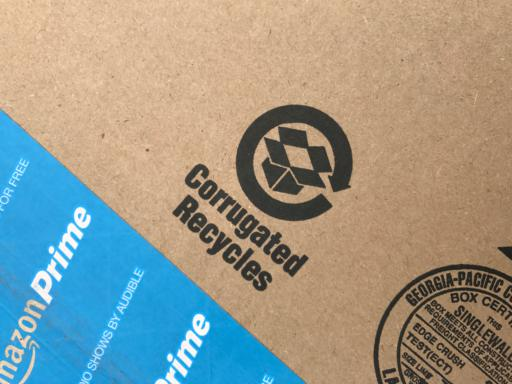

In [18]:
import os
import random
from IPython.display import Image, display

# Specify the path to your image folder
folder_path = '/content/output_dataset/train/Recyclable Images'  # Update this path as needed

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Print the list of image files for debugging
print("Image files found:", image_files)

# Check if there are any images in the list
if image_files:
    # Select a random image from the list
    selected_image = random.choice(image_files)

    # Display the randomly selected image
    image_path = os.path.join(folder_path, selected_image)
    display(Image(filename=image_path))
else:
    print("No images found in the specified folder.")



In [19]:
import os
import random
from IPython.display import Image, display

# Specify the path to your image folder
folder_path = '/content/output_dataset/train/Trash Images'  # Update this path as needed

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Print the list of image files for debugging
print("Image files found:", image_files)

# Check if there are any images in the list
if image_files:
    # Select a random image from the list
    selected_image = random.choice(image_files)

    # Display the randomly selected image
    image_path = os.path.join(folder_path, selected_image)
    display(Image(filename=image_path))
else:
    print("No images found in the specified folder.")


Image files found: []
No images found in the specified folder.


**Data Augmentation**

In [20]:
!pip install Augmentor